In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Getting the Train Dataset Ready

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


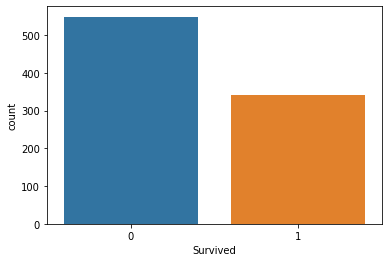

In [4]:
sns.countplot(x = 'Survived', data = df_train)

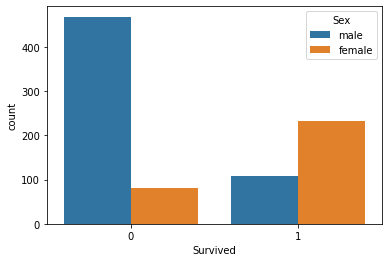

In [5]:
sns.countplot(x = 'Survived',hue='Sex',data=df_train)
# number of females survived is more than male survived

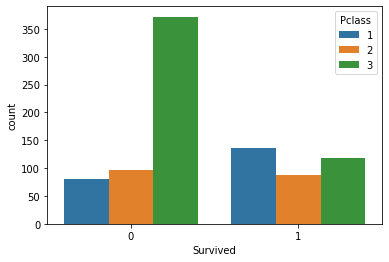

In [6]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = df_train)
#Pclass = 1 people survived more and Pclass = 3 died more

In [7]:
df_train.isnull().sum()
#many null values in age and cabin and 2 in embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


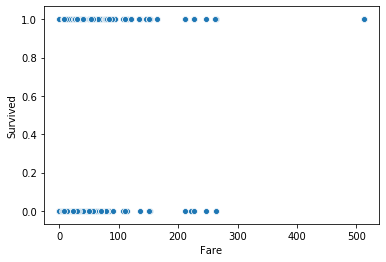

In [9]:
#fare vs survived
sns.scatterplot(x="Fare",
                    y="Survived",
                    data=df_train)

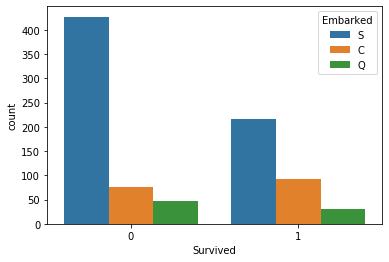

In [10]:
sns.countplot(x = 'Survived',hue = 'Embarked',data = df_train)
#embarked = S have survived more 

In [11]:
#in this we wont drop the null values rather take the mean and fill them with those values 

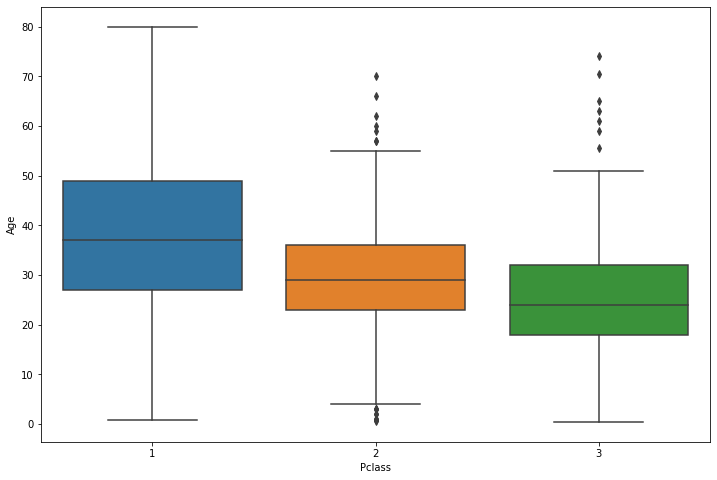

In [12]:
#finding the average age based on the Pclass 
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Pclass',y = 'Age',data = df_train)

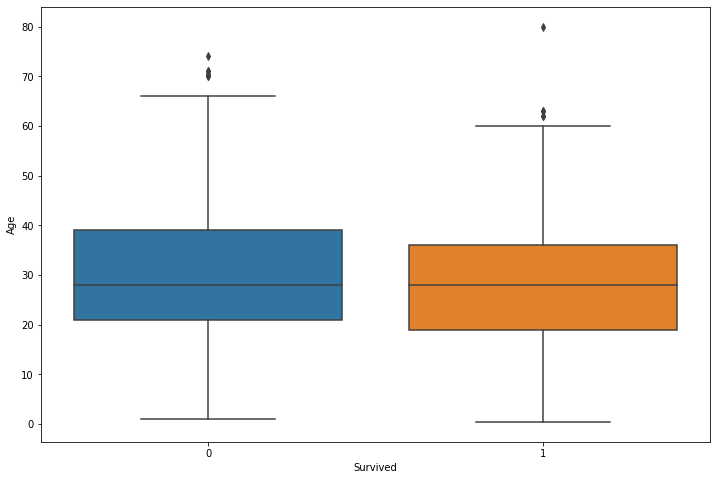

In [13]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Survived',y = 'Age',data = df_train)
#by this we see that age doesnt affect much on survival

In [14]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(df_train[df_train['Pclass'] == Pclass]['Age'].mean())
    else:
        return Age

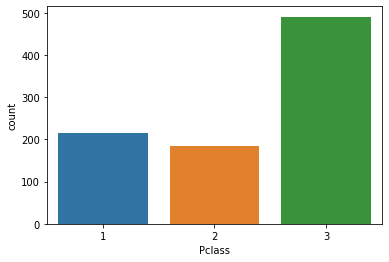

In [15]:
sns.countplot(x = 'Pclass',data = df_train)
#most of the passengers belong to S class

In [16]:
df_train["Age"] = df_train[["Age","Pclass"]].apply(input_age,axis = 1)

In [17]:
#as it has many null values
df_train.drop("Cabin",inplace = True,axis = 1)

In [18]:
common_Pclass = 'S'
for data in df_train:
    df_train['Embarked'] = df_train['Embarked'].fillna(common_Pclass)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# we see no null values and cabin column is dropped
#next step is to get dummies for categorical data from label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df_train['Sex'] = encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = encoder.fit_transform(df_train['Embarked'])
df_train['Pclass'] = encoder.fit_transform(df_train['Pclass'])

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [26]:
df_train.drop(['PassengerId','Name','Ticket'],inplace = True,axis = 1)

In [27]:
df_train.head(-1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,2,0,39.0,0,5,29.1250,1
886,0,1,1,27.0,0,0,13.0000,2
887,1,0,0,19.0,0,0,30.0000,2
888,0,2,0,25.0,1,2,23.4500,2


In [28]:
df_train.shape

(891, 8)

In [29]:
x_train = df_train.drop("Survived",axis = 1)
y_train = df_train['Survived']

In [30]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state = 64)
logR.fit(x_train,y_train)

C:\Users\vatsa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=64, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Getting Test Dataset Ready

In [31]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [32]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
df_test.shape

(418, 11)

In [34]:
df_test.drop("Cabin",inplace = True,axis = 1)

In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [36]:
x = df_test["Age"].mean()

In [37]:
print(x)

30.272590361445783


In [38]:
for data in df_test:
    df_test["Age"] = df_test["Age"].fillna(x)

In [39]:
y = df_test["Fare"].mean()

In [40]:
print(y)

35.6271884892086


In [41]:
for data in df_test:
    df_test["Fare"] = df_test["Fare"].fillna(y)

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [43]:
df_test['Sex'] = encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = encoder.fit_transform(df_test['Embarked'])
df_test['Pclass'] = encoder.fit_transform(df_test['Pclass'])

In [44]:
df_test.head(-1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,2,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,1,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,2,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
412,1304,2,"Henriksson, Miss. Jenny Lovisa",0,28.00000,0,0,347086,7.7750,2
413,1305,2,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,0,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,2,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2


In [45]:
df_test.drop(['PassengerId','Name','Ticket'],inplace = True,axis = 1)

In [46]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2


In [47]:
df_test.shape

(418, 7)

In [48]:
y_preds = logR.predict(df_test)

In [49]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
from sklearn.metrics import classification_report, accuracy_score, log_loss
y_test = pd.read_csv('gender_submission.csv')
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
y_test.drop("PassengerId",inplace = True,axis = 1)

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



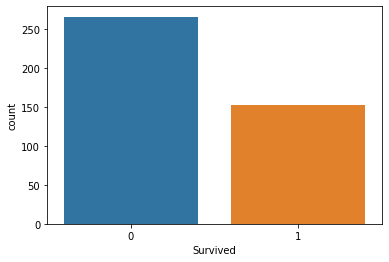

In [53]:
sns.countplot(x = 'Survived',data = y_test)

In [54]:
accuracy_score(y_test,y_preds)

0.9449760765550239

In [55]:
log_loss(y_test,y_preds)

1.900481943186862

# Manually Computing the Dataset

In [56]:
from numpy import log, dot, e

In [57]:
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [58]:
def optimize(x, y,learning_rate,iterations,parameters):
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

In [59]:
# Initialize the weight and bais
init_parameters = {} 
init_parameters["weight"] = np.zeros(x_train.shape[1])
init_parameters["bias"] = 0

In [60]:
# Define the train function
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [65]:
# Train the model
parameters_out = train(x_train, y_train, learning_rate = 0.001, iterations = 10000)
parameters_out

C:\Users\vatsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


{'weight': array([ -2.15377658, -32.28282467,   0.19037288,  -7.08183705,
         -2.96032904,   0.12636343,   0.89390245]), 'bias': 15.62011281523729}

In [66]:
output_values = np.dot(df_test, parameters_out["weight"]) + parameters_out["bias"]
predictions = sigmoid(output_values) >= 1/2
predictions

array([False,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,

In [67]:
accuracy_score(y_test,predictions)

0.9641148325358851

In [68]:
log_loss(y_test,predictions)

1.2394508169746237